In [11]:
import numpy as np
from math import inf, sqrt
from matplotlib import pyplot as plt

In [12]:
def func(x):
    return x * x - np.sin(2 * x) + 6


def dfunc(x):
    return 2 * x - 2 * np.cos(2 * x)


def ddfunc(x):
    return 2 + 4 * np.sin(2 * x)


def count_x_y(x_start=-1, x_end=1, steps=10000):
    x = np.linspace(x_start, x_end, steps)
    y = np.linspace(0, 0, len(x))
    for i in range(0, len(x), 1):
        y[i] = func(x[i])
    return x, y

# 1. Метод Ньютона-Рапсона
**Метод Ньютона-Рапсона** — это численный метод решения уравнений, который использует итерационный процесс для приближенного нахождения корня уравнения. Алгоритм метода следующий:

1. **Начальный выбор:**
   - Выбирается начальное приближение $x_0$ к корню уравнения.

2. **Итерационный процесс:**
   - На каждом шаге $n$ вычисляется следующее приближение $x_{n+1}$ по формуле:

$$
x_{n+1} = x_n - \frac{f'(x_n)}{f''(x_n)}
$$

   где:
   - $f'(x_n)$ — значение первой производной функции в точке $x_n$,
   - $f''(x_n)$ — значение первой производной функции в точке $x_n$.

3. **Обновление:**
   - Процесс повторяется, и каждый раз вычисляется новое приближение корня.

4. **Проверка сходимости:**
   - Итерации продолжаются до тех пор, пока не будет достигнута заданная точность (критерий сходимости) или выполнено другое условие останова.

Метод Ньютона-Рапсона имеет квадратичную скорость сходимости, что означает, что с каждой итерацией удваивается количество верных знаков в приближении к корню. Однако, он требует наличия производной функции, что может быть вызовом для сложных функций или в случае, когда вычисление производной затруднительно.

In [13]:
def newton_raphson(x0, eps):
    xk = inf
    xk1 = x0
    iter_count = 0
    while abs(xk - xk1) > eps:
        xk = xk1
        xk1 = xk - dfunc(xk) / ddfunc(xk)
        iter_count += 1

    xopt = xk1
    fopt = func(xopt)

    return xopt, fopt, iter_count

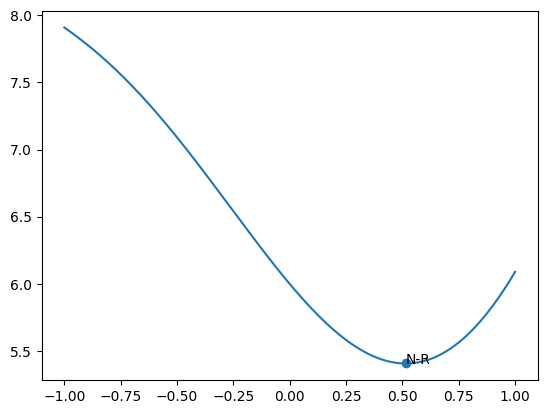

0.5149332646611294 5.407925998722057 4


In [14]:
x0 = 1
eps = 0.0001

xopt, fopt, iter_count = newton_raphson(x0, eps)

x, y = count_x_y()

p1 = plt.plot(x, y)
plt.scatter(xopt, fopt)
plt.text(xopt, fopt, "N-R")
plt.show()

print(xopt, fopt, iter_count)

# 2. Метод секущих
**Метод секущих (метод хорд)** — это численный метод решения уравнений, аппроксимирующий корень путем построения хорды (отрезка) на графике функции и использования ее для приближенного определения корня. 

Основное различие между методом секущих и методом Ньютона-Рафсона заключается в том, что в методе секущих вводится аппроксимация для второй производной:
$$ f''(x_n) = \frac{f'(x_n) - f'(x_{n-1})}{x_n - x_{n-1}} $$

поэтому итерационная формула метода секущих принимает следующий вид:
$$ x_{n+1} = x_n - f'(x_n)\frac{x_n - x_{n-1}}{f'(x_n)-f'(x_{n-1})} $$

Как видно из формулы, теперь не требуется, чтобы функция была дифференцируема до второго порядка, но теперь нам нужны две начальные точки. Выбором хорошего начального интервала (начальных точек) мы позволяем алгоритму сходиться к оптимуму. Этот подход может уменьшить скорость сходимости по сравнению с методом Ньютона-Рафсона.

Алгоритм метода следующий:

1. **Начальный выбор:**
   - Выбираются две начальные точки $x_0$ и $x_1$, близкие к корню уравнения.

2. **Итерационный процесс:**
   - Строится хорда между точками $(x_n, f(x_n))$ и $(x_{n+1}, f(x_{n+1}))$.
   - Новая аппроксимация корня $x_2$ находится как пересечение хорды с осью $x$.

$$ x_{n+1} = x_n - f'(x_n)\frac{x_n - x_{n-1}}{f'(x_n)-f'(x_{n-1})} $$

3. **Обновление:**
   - Точки $x_0$ и $x_1$ обновляются: $x_0 = x_1$, $x_1 = x_2$.

4. **Повторение:**
   - Процесс повторяется до сходимости (достаточного приближения к корню) или до выполнения другого критерия останова.

Метод секущих аппроксимирует производную функции при помощи разностного приближения, и, в отличие от метода Ньютона, не требует вычисления производной в явной форме. Однако, он может быть менее быстрым в сходимости по сравнению с методом Ньютона.

In [15]:
def secant(x0, x1, eps):
    xk = inf
    xk1 = x0
    xk2 = x1
    iter_count = 0
    while abs(xk - xk1) > eps:
        xk = xk1
        xk1 = xk2
        xk2 = xk1 - dfunc(xk1) * (xk1 - xk) / (dfunc(xk1) - dfunc(xk))
        iter_count += 1

    xopt = xk1
    fopt = func(xopt)

    return xopt, fopt, iter_count

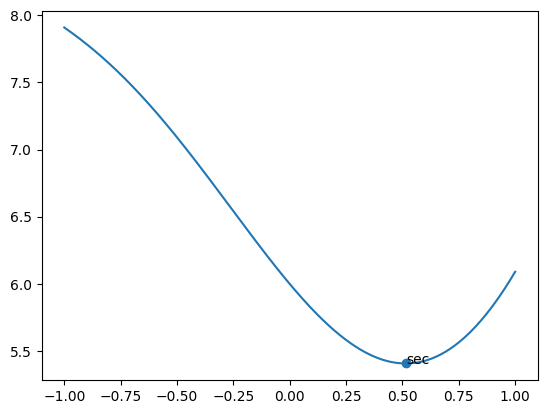

0.5149317515595062 5.407925998728271 5


In [16]:
x0 = 0
x1 = 1
eps = 0.001
xopt, fopt, iter_count = secant(x0, x1, eps)

x, y = count_x_y()

p1 = plt.plot(x, y)
plt.scatter(xopt, fopt)
plt.text(xopt, fopt, "sec")
plt.show()

print(xopt, fopt, iter_count)

# 3. Метод Фибоначчи
**Метод Фибоначчи** — это численный метод оптимизации, который используется для нахождения минимума (или максимума) функции в заданном интервале. Алгоритм метода включает следующие шаги:

1. **Выбор начальных точек:**
   - Задаются начальные границы интервала $[a, b]$ и точность $\varepsilon$.

2. **Инициализация ряда Фибоначчи:**
   - Находится такое число $n$, что $F_n \geq \frac{b - a}{\varepsilon}$, где $F_n$ — $n$-е число Фибоначчи.
   - Выбираются начальные точки $x_1$ и $x_2$ внутри интервала так, чтобы длина интервала была равна $\frac{b - a}{F_n}$.

3. **Итерационный процесс:**
   - На каждом шаге процесса точки $x_1$ и $x_2$ обновляются в зависимости от того, какая из подинтервалов $[a, x_2]$ или $[x_1, b]$ содержит минимум (максимум) функции.
   - Длина выбранного подинтервала уменьшается в соответствии с последовательностью чисел Фибоначчи: $F_n$ умножается на $\frac{F_{n-2}}{F_{n-1}}$.
   - Процесс повторяется до достижения заданной точности.

4. **Завершение:**
   - Процесс завершается, когда длина текущего интервала становится меньше или равной $\varepsilon$.

Метод Фибоначчи основан на идее последовательного уточнения интервала, содержащего оптимальное решение, и может быть использован для оптимизации унимодальных функций. Однако, в сравнении с некоторыми другими методами оптимизации, метод Фибоначчи может требовать больше вычислительных ресурсов.

In [17]:
def fib(a): ## first 'a' numbers of fib siquence
    fibs = [1, 1]
    while fibs[len(fibs) - 1] < a:
        fibs.append(fibs[len(fibs) - 1] + fibs[len(fibs) - 2])
    n = len(fibs) - 1
    return n, fibs

def fib_opt_search(l, r, eps):
    crit = (r - l) / eps
    iter_counter, fibs = fib(crit)

    for i in range(iter_counter, 1, -1):
        x1 = l + fibs[i - 2] / fibs[i] * (r - l)
        x2 = l + r - x1
        if func(x1) > func(x2):
            l = x1
        else:
            r = x2

    return l, r, iter_counter

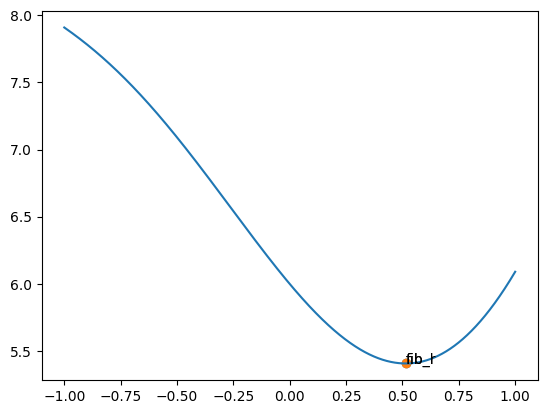

16
0.5140889167188477 5.407927933511041
0.5147150907952409 5.407926127922801


In [18]:
eps = 0.001
a = 0
b = 1

left, right, n = fib_opt_search(a, b, eps)
fleft = func(left)
fright = func(right)

x, y = count_x_y()

p1 = plt.plot(x, y)
plt.scatter(left, fleft)
plt.text(left, fleft, "fib_l")
plt.scatter(right, fright)
plt.text(right, fright, "fib_r")
plt.show()

print(n)
print(left, fleft)
print(right, fright)

# 4. Метод Золотого сечения
**Метод Золотого сечения** — это численный метод оптимизации, используемый для нахождения локального минимума (или максимума) унимодальной функции в заданном интервале. Алгоритм метода включает следующие шаги:

1. **Выбор начальных точек:**
   - Задаются начальные границы интервала $[a, b]$ и точность $\varepsilon$.

2. **Инициализация точек:**
   - Выбираются две промежуточные точки $x_1$ и $x_2$ внутри интервала так, чтобы отношение длин отрезков $[a, x_2]$ и $[x_1, b]$ было равно золотому сечению, т.е.,

$$
\frac{b - x_2}{x_2 - a} = \frac{x_2 - a}{b - x_1} = \phi
$$

где $\phi$ — золотое сечение, приближенно равное 1.618.

3. **Итерационный процесс:**
   - Оценивается значение функции в точках $f(x_1)$ и $f(x_2)$.
   - Сравниваются значения функции в точках $x_1$ и $x_2$, и один из концов интервала сужается в сторону, где функция принимает меньшее значение.
   - Процесс повторяется, пока длина текущего интервала становится меньше или равной $\varepsilon$.

4. **Завершение:**
   - Процесс завершается, когда достигается заданная точность.

Метод Золотого сечения обладает свойством сходиться к оптимальному решению экспоненциально быстро. Этот метод особенно эффективен для унимодальных функций, т.е., функций, имеющих только один локальный экстремум.

In [19]:
def golden_ratio(l, r, eps):
    phi = (1 + sqrt(5)) / 2
    resphi = 2 - phi

    x1 = l + resphi * (r - l)
    x2 = r - resphi * (r - l)

    iter_count = 0
    while abs(r - l) > eps:
        iter_count += 1
        
        if func(x1) < func(x2):
            r, x2 = x2, x1
            x1 = l + resphi * (r - l)
        else:
            l , x1 = x1, x2
            x2 = r - resphi * (r - l)

    return x1, x2, iter_count

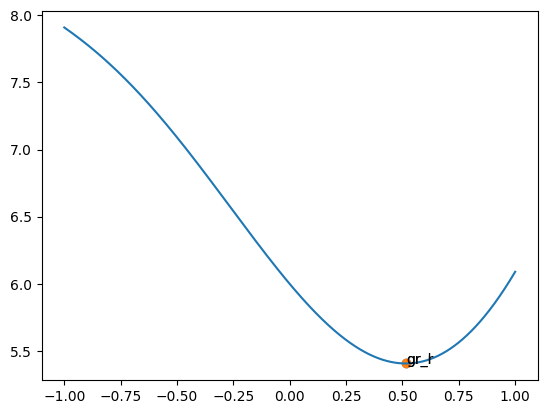

15
0.5149884610860683 5.40792600699217
0.5151615313577806 5.407926140169046


In [20]:
eps = 0.001
a = 0
b = 1
left, right, n = golden_ratio(a, b, eps)
fleft = func(left)
fright = func(right)

x, y = count_x_y()

p1 = plt.plot(x, y)
plt.scatter(left, fleft)
plt.text(left, fleft, "gr_l")
plt.scatter(right, fright)
plt.text(right, fright, "gr_r")
plt.show()

print(n)
print(left, fleft)
print(right, fright)